In [1]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import json 
from PIL import Image
from io import BytesIO

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
#save subscription key and end_point as variables
my_cv_sub_key = %env AZURE_MOOC_VISION_KEY
my_cv_end_point = %env AZURE_MOOC_VISION_URL

In [3]:
# build the rest of the uri
my_analyze_url = my_cv_end_point + "vision/v2.1/analyze"
my_analyze_url

'https://moocvision.cognitiveservices.azure.com/vision/v2.1/analyze'

In [4]:
#my_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Pont_des_Arts%2C_Paris.jpg/2560px-Pont_des_Arts%2C_Paris.jpg"
my_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Paris_Night.jpg/2560px-Paris_Night.jpg"
#my_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Paris_vue_d%27ensemble_tour_Eiffel.jpg/1920px-Paris_vue_d%27ensemble_tour_Eiffel.jpg"

In [5]:
#configure the requests object - this is how we send the request to the api
headers = {'Ocp-Apim-Subscription-Key': my_cv_sub_key}
#print(headers)
params = {'visualFeatures':'Categories,Description,Objects'}
print(params)
data = {'url': my_image_url}
print(data)
response = requests.post(my_analyze_url, headers=headers,params=params,json=data)
print(type(response))
response

{'visualFeatures': 'Categories,Description,Objects'}
{'url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Paris_Night.jpg/2560px-Paris_Night.jpg'}
<class 'requests.models.Response'>


<Response [200]>

In [6]:
#store the results in the analysis object
analysis=response.json()
print(type(analysis))
print(analysis)

<class 'dict'>
{'categories': [{'name': 'abstract_', 'score': 0.00390625}, {'name': 'outdoor_', 'score': 0.0078125, 'detail': {'landmarks': [{'name': 'Tour Montparnasse', 'confidence': 0.9380523562431335}]}}], 'description': {'tags': ['outdoor', 'building', 'city', 'view', 'water', 'field', 'large', 'mountain', 'ocean', 'many', 'track', 'beach'], 'captions': [{'text': 'a view of Tour Montparnasse', 'confidence': 0.9382543191810944}]}, 'objects': [], 'requestId': '4607372f-1765-467f-9815-fe47898aeea1', 'metadata': {'height': 808, 'width': 2559, 'format': 'Jpeg'}}


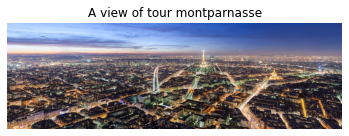

In [7]:
#Display the image with the caption
image = Image.open(BytesIO(requests.get(my_image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(analysis["description"]["captions"][0]["text"].capitalize(), size="large")
plt.show()
